## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading The Dataset

In [4]:
data = pd.read_csv("/content/customer_churn_large_dataset.csv")

In [5]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# Data Exploration

In [6]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [8]:
data.describe

<bound method NDFrame.describe of        CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63    Male  Los Angeles   
1               2       Customer_2   62  Female     New York   
2               3       Customer_3   24  Female  Los Angeles   
3               4       Customer_4   36  Female        Miami   
4               5       Customer_5   46  Female        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                              17         73.36             236      0  
1                               1         48.76    

In [9]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [10]:
data.shape

(100000, 9)

In [11]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

# Data Preprocessing

### Dropping irrelevant column

In [12]:
data.drop('Name',axis = 1,inplace = True)
data.drop('CustomerID',axis = 1,inplace = True)
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


## Checking for Imbalance

not_churned:  50221 , churned:  49779


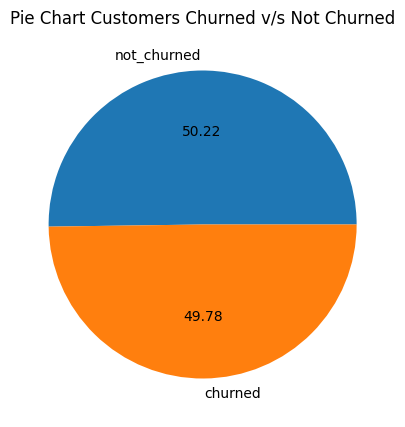

In [13]:
not_churned = data[data['Churn']==0]['Churn'].count()
churned = data[data['Churn']== 1]['Churn'].count()
print('not_churned: ',not_churned,', churned: ',churned)

fig = plt.figure(figsize=(5,5))
plt.pie([not_churned,churned], labels=['not_churned','churned'],autopct='%.2f')
plt.title('Pie Chart Customers Churned v/s Not Churned')
plt.show()

### here we can see that the data is balanced

# Visualising The Distirbution of Features for both classes

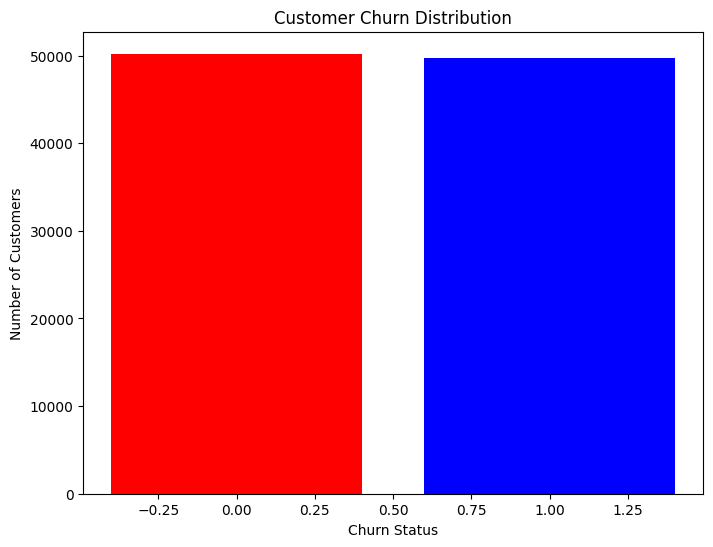

In [14]:
churn_counts = data['Churn'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values, color=['red', 'blue'])
plt.title('Customer Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

## Age Distribution

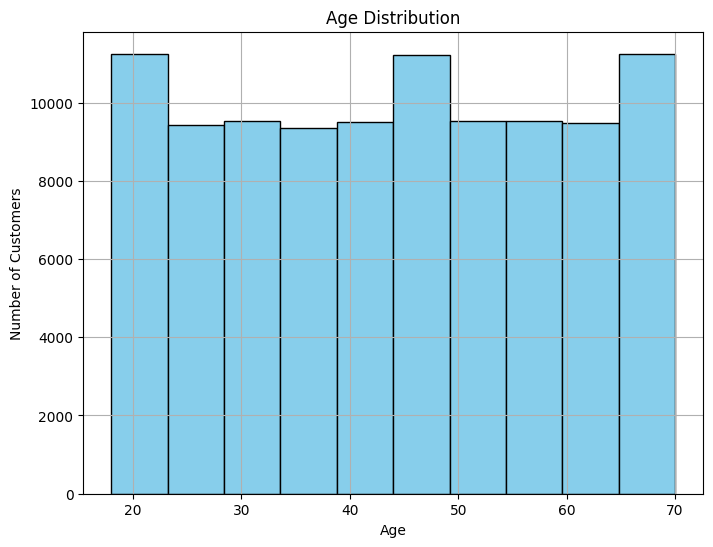

In [15]:

plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()





## Ages are quite well distributed

In [16]:
## Gender Distribution

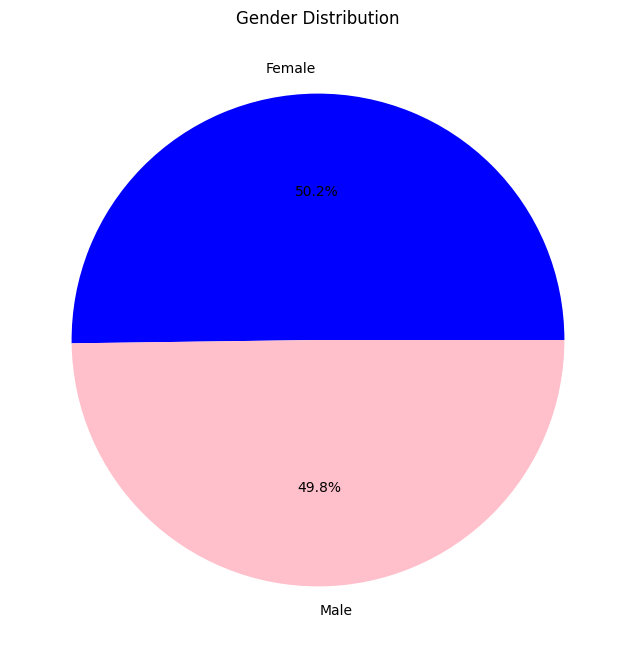

In [17]:
gender_counts = data['Gender'].value_counts()

# Create a pie chart for gender distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Gender Distribution')
plt.show()

## Even the Gender Data is quite well distributed

## Location Distribution

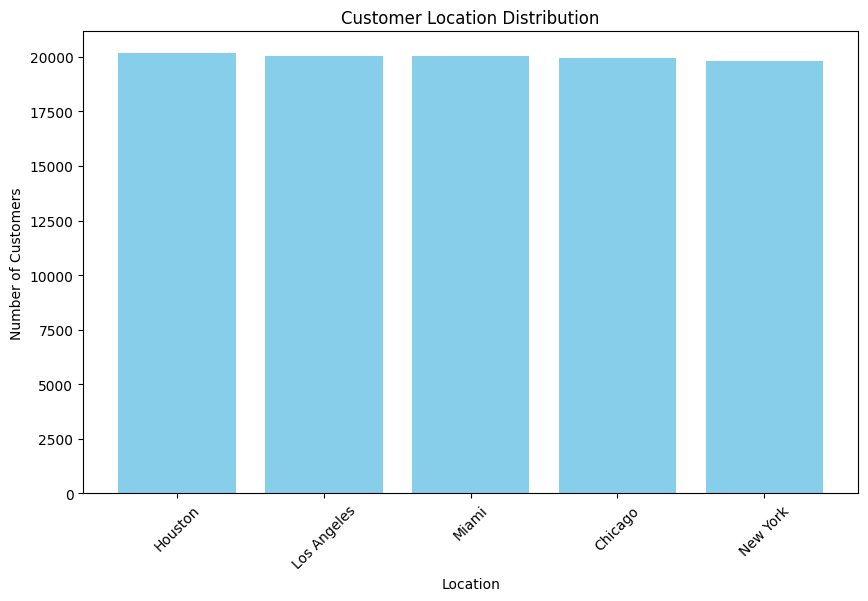

In [18]:
location_counts = data['Location'].value_counts()

# Create a bar chart for location distribution
plt.figure(figsize=(10, 6))
plt.bar(location_counts.index, location_counts.values, color='skyblue')
plt.title('Customer Location Distribution')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

## Even the Locations are quite well distributed

## After Checking out all the visusalisations we can see that the data is very well distributed

#Outlier Detection

## Using Boxplots

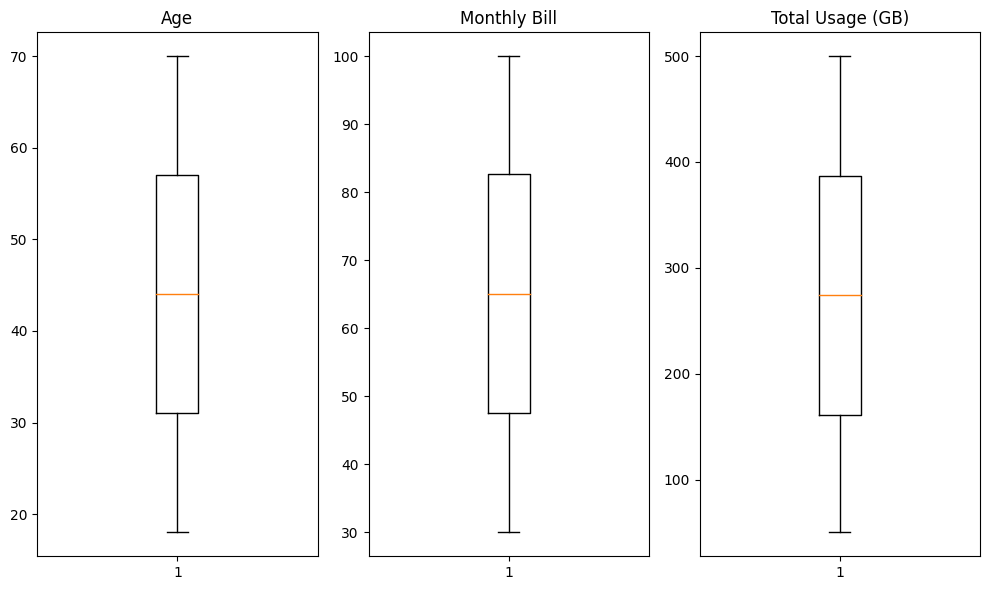

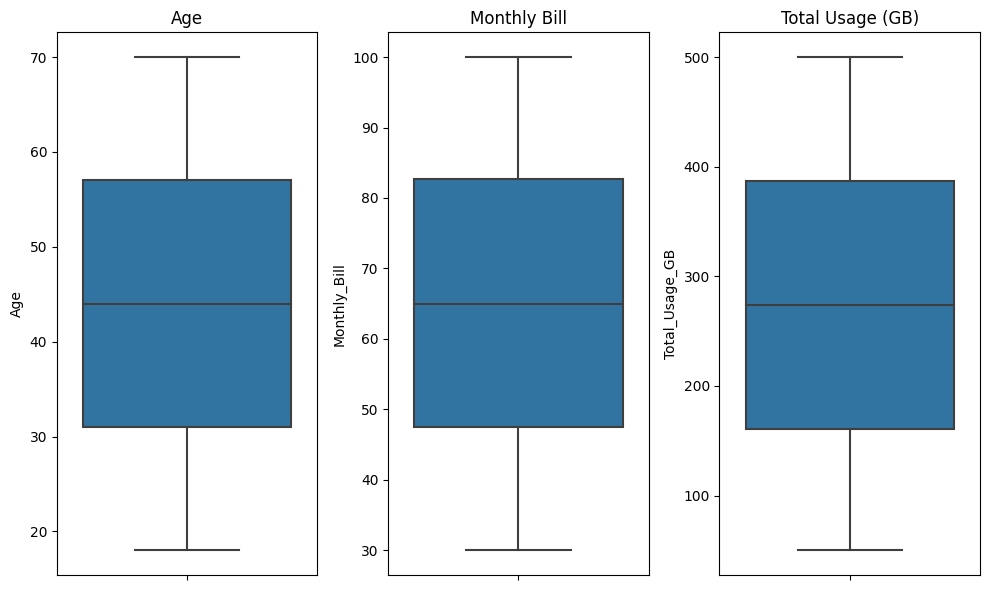

In [19]:
plt.figure(figsize=(10, 6))

# Using Matplotlib
plt.subplot(131)
plt.boxplot(data['Age'])
plt.title('Age')

plt.subplot(132)
plt.boxplot(data['Monthly_Bill'])
plt.title('Monthly Bill')

plt.subplot(133)
plt.boxplot(data['Total_Usage_GB'])
plt.title('Total Usage (GB)')

plt.tight_layout()
plt.show()

# Using Seaborn for a nicer visualization
plt.figure(figsize=(10, 6))

plt.subplot(131)
sns.boxplot(data=data, y='Age')
plt.title('Age')

plt.subplot(132)
sns.boxplot(data=data, y='Monthly_Bill')
plt.title('Monthly Bill')

plt.subplot(133)
sns.boxplot(data=data, y='Total_Usage_GB')
plt.title('Total Usage (GB)')

plt.tight_layout()
plt.show()

## The Data doesn't contain any outliers

 # Data Encoding

In [20]:
data = pd.get_dummies(data, columns=['Gender', 'Location'], drop_first = True)
data.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


# Splitting The dataset

In [21]:
x = data.drop("Churn",axis=1)
y = data['Churn']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [23]:
X_train.shape, y_train.shape

((75000, 9), (75000,))

In [24]:
X_test.shape, y_test.shape


((25000, 9), (25000,))

# Feature Scaling

In [25]:
columns_to_check = data.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (data[column] > 1).any() or (data[column] < 0).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than 1 or less than 0:")
print(columns_needs_to_be_scaled)

Columns with values greater than 1 or less than 0:
['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']


In [26]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

scaler = StandardScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [27]:
X_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
98980,1.438624,0.218293,-0.522361,1.555926,1,0,0,1,0
69824,1.373174,-0.070814,-0.481331,0.728796,1,0,0,0,0
9928,-0.786654,-0.359921,0.771821,0.805382,1,0,0,1,0
75599,-0.263059,1.230167,-1.291553,-0.642097,1,0,1,0,0
95621,0.522333,1.374720,-0.234655,1.349143,1,0,1,0,0


In [28]:
X_test.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
75721,0.260536,-0.215367,1.156417,1.663147,0,1,0,0,0
80184,0.325985,0.073740,-1.209987,1.134702,1,0,0,0,1
19864,-0.852103,-1.082688,-1.585686,0.008886,0,0,1,0,0
76699,0.587782,-1.227241,1.461919,0.491379,1,0,0,0,1
92991,-1.375698,1.663827,0.846466,0.223327,0,0,1,0,0


## Feature Importance and Feature Selection

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,Monthly_Bill,0.314822
1,Total_Usage_GB,0.287301
2,Age,0.195162
3,Subscription_Length_Months,0.143992
4,Gender_Male,0.017313
5,Location_Los Angeles,0.011228
6,Location_Houston,0.010768
7,Location_Miami,0.010350
8,Location_New York,0.009063


## Cheacking Optimal Number of Features

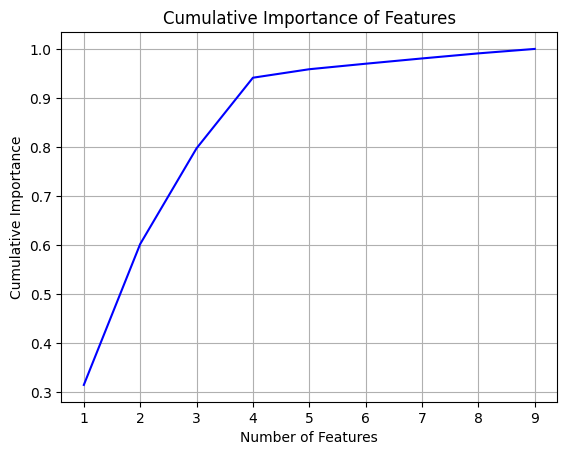

In [30]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

In [31]:
#Listing the four variables
X_train = X_train[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]

X_test = X_test[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]

# Checking if adding the other variables will increase the model performance (Using Cross Validation)

In [32]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load your dataset with existing features and new features
# Replace 'your_dataset.csv' with the actual file


# Define the existing features (X) and target (y)
X_existing = data[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]  # Replace with your existing features
y = data['Churn']  # Replace 'Target' with your target variable

# Create a base model with only existing features
base_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can use a different model

# Perform cross-validation with existing features
cv_scores_base = cross_val_score(base_model, X_existing, y, cv=5, scoring='accuracy')

# Define the new features
X_new = data[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months',
       'Gender_Male', 'Location_Miami', 'Location_Houston',
       'Location_Los Angeles', 'Location_New York']]  # Add your new features

# Create a model with both existing and new features
model_with_new = RandomForestClassifier(n_estimators=100, random_state=42)  # You can use a different model

# Perform cross-validation with existing and new features
cv_scores_new = cross_val_score(model_with_new, X_new, y, cv=5, scoring='accuracy')

# Compare cross-validation scores
print("Cross-Validation Scores with Existing Features Only:", cv_scores_base)
print("Average Accuracy with Existing Features Only:", cv_scores_base.mean())

print("\nCross-Validation Scores with Existing and New Features:", cv_scores_new)
print("Average Accuracy with Existing and New Features:", cv_scores_new.mean())

Cross-Validation Scores with Existing Features Only: [0.5035  0.49725 0.50625 0.49965 0.50165]
Average Accuracy with Existing Features Only: 0.50166

Cross-Validation Scores with Existing and New Features: [0.49655 0.49755 0.49635 0.50015 0.4998 ]
Average Accuracy with Existing and New Features: 0.49808


# As we can see adding other features doesn't increase the accuracy of the model, so we choose to continue with only 4 features

# **MODEL** **BUILDING**

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from xgboost import XGBClassifier


# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVC': SVC(),
    'Adaboost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each classifier
results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    report = classification_report(y_train, y_pred)
    conf_matrix = confusion_matrix(y_train, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

# Print the results
for name, metrics in results.items():
    print(f"Metrics for {name}:")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print("Classification Report:\n", metrics['Classification Report'])
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
    print()


Metrics for Logistic Regression:
Accuracy: 0.50
F1 Score: 0.33
Precision: 0.50
Recall: 0.25
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.75      0.60     37643
           1       0.50      0.25      0.33     37357

    accuracy                           0.50     75000
   macro avg       0.50      0.50      0.47     75000
weighted avg       0.50      0.50      0.47     75000

Confusion Matrix:
 [[28297  9346]
 [28103  9254]]

Metrics for Decision Tree:
Accuracy: 1.00
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37643
           1       1.00      1.00      1.00     37357

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000

Confusion Matrix:
 [[37643     0]
 [    0 37357]]

Metrics for Gaussi

In [36]:
# Test and evaluate each classifier
test_results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    # Test data
    y_test_pred = classifier.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    test_results[name] = {
        'Accuracy': accuracy_test,
        'F1 Score': f1_test,
        'Precision': precision_test,
        'Recall': recall_test
    }

# Print the test results
for name, metrics in test_results.items():
    print(f"Metrics for {name} on Test Data:")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print()

Metrics for Logistic Regression on Test Data:
Accuracy: 0.50
F1 Score: 0.33
Precision: 0.50
Recall: 0.25

Metrics for Decision Tree on Test Data:
Accuracy: 0.50
F1 Score: 0.50
Precision: 0.50
Recall: 0.49

Metrics for Gaussian Naive Bayes on Test Data:
Accuracy: 0.50
F1 Score: 0.34
Precision: 0.49
Recall: 0.25

Metrics for AdaBoost on Test Data:
Accuracy: 0.50
F1 Score: 0.45
Precision: 0.50
Recall: 0.42

Metrics for K-Nearest Neighbors on Test Data:
Accuracy: 0.50
F1 Score: 0.49
Precision: 0.49
Recall: 0.49

Metrics for SVC on Test Data:
Accuracy: 0.50
F1 Score: 0.44
Precision: 0.50
Recall: 0.39

Metrics for Adaboost on Test Data:
Accuracy: 0.50
F1 Score: 0.45
Precision: 0.50
Recall: 0.42

Metrics for XGBoost on Test Data:
Accuracy: 0.50
F1 Score: 0.49
Precision: 0.50
Recall: 0.49



# Out of the above models, KNN and XGBoost performs better than other models on training data and on testing data almost all of them perform the same

## Ensemble

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create base classifiers (you can customize these)
clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
clf3 = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)

# Create an ensemble of boosting algorithms using VotingClassifier
ensemble = VotingClassifier(estimators=[
    ('decision_tree', clf1),
    ('gradient_boosting', clf2),
    ('adaboost', clf3)
], voting='soft')

# Fit the ensemble on the training data
ensemble.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensemble.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.50188
Confusion Matrix:
 [[7970 4608]
 [7845 4577]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.63      0.56     12578
           1       0.50      0.37      0.42     12422

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.49     25000
weighted avg       0.50      0.50      0.49     25000



# Ensemble don't privde any better result

# Neural Networks

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Epoch 1/10
2344/2344 [==============================] - 4s 1ms/step - loss: 0.6938 - accuracy: 0.4997
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6933 - accuracy: 0.5025
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6933 - accuracy: 0.5007
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6931 - accuracy: 0.5012
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6931 - accuracy: 0.5004
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5005
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6931 - accuracy: 0.5011
Epoch 8/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5027
Epoch 9/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6931 - accuracy: 0.5041
Epoch 10/10
782/782 [==============================] - 1s 761us/step
Accuracy: 0.5

# Even Neural Networks don't provide any better results

#Hyperparamter Tuning

# Hyperparameter Tuning of the two best models

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

# Evaluate the best KNN model on the test data
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best KNN Model (Accuracy): {accuracy:.2f}")


Best KNN Model (Accuracy): 0.50


In [38]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in boosting
    'max_depth': [3, 4, 5],  # Maximum depth of the trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (hessian) needed in a child
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

# Evaluate the best XGBoost model on the test data
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best XGBoost Model (Accuracy): {accuracy:.2f}")


Best XGBoost Model (Accuracy): 0.50


## We get the same result, so still can't decide the first one

## Recall, also known as the true positive rate or sensitivity, measures the ability of your model to correctly identify all the customers who are likely to churn. It's the ratio of true positives to the total actual positive cases (churned customers).

# Using Recall to differentiate the two models

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Predict on the train and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate recall for train and test data
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

# Print the results
print(f"Recall on Train Data: {recall_train:.2f}")
print(f"Recall on Test Data: {recall_test:.2f}")


Recall on Train Data: 0.69
Recall on Test Data: 0.49


In [40]:
import xgboost as xgb
from sklearn.metrics import recall_score

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predict on the train and test data
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate recall for train and test data
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

# Print the results
print(f"Recall on Train Data: {recall_train:.2f}")
print(f"Recall on Test Data: {recall_test:.2f}")


Recall on Train Data: 0.64
Recall on Test Data: 0.49


## We choose KNN Model as KNN works better (recall as a metric) on train compared to XGBoost

# Cross validation

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score



# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Perform 5-fold cross-validation (you can adjust the number of folds)
accuracy_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Accuracy for Fold {fold}: {accuracy:.2f}")

# Calculate the mean and standard deviation of the accuracy scores
mean_accuracy = accuracy_scores.mean()
std_accuracy = accuracy_scores.std()

print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")


Accuracy for Fold 1: 0.50
Accuracy for Fold 2: 0.50
Accuracy for Fold 3: 0.50
Accuracy for Fold 4: 0.50
Accuracy for Fold 5: 0.50
Mean Accuracy: 0.50
Standard Deviation of Accuracy: 0.00


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score



# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Perform 5-fold cross-validation (you can adjust the number of folds)
accuracy_scores = cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Accuracy for Fold {fold}: {accuracy:.2f}")

# Calculate the mean and standard deviation of the accuracy scores
mean_accuracy = accuracy_scores.mean()
std_accuracy = accuracy_scores.std()

print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")


Accuracy for Fold 1: 0.51
Accuracy for Fold 2: 0.49
Accuracy for Fold 3: 0.50
Accuracy for Fold 4: 0.49
Accuracy for Fold 5: 0.49
Mean Accuracy: 0.50
Standard Deviation of Accuracy: 0.01


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Perform 5-fold cross-validation (you can adjust the number of folds)
recall_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall')

# Print the recall scores for each fold
for fold, recall in enumerate(recall_scores, start=1):
    print(f"Recall for Fold {fold}: {recall:.2f}")

# Calculate the mean and standard deviation of the recall scores
mean_recall = recall_scores.mean()
std_recall = recall_scores.std()

print(f"Mean Recall: {mean_recall:.2f}")
print(f"Standard Deviation of Recall: {std_recall:.2f}")


Recall for Fold 1: 0.48
Recall for Fold 2: 0.50
Recall for Fold 3: 0.49
Recall for Fold 4: 0.49
Recall for Fold 5: 0.49
Mean Recall: 0.49
Standard Deviation of Recall: 0.00


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Perform 5-fold cross-validation (you can adjust the number of folds)
recall_scores = cross_val_score(knn, X_test, y_test, cv=5, scoring='recall')

# Print the recall scores for each fold
for fold, recall in enumerate(recall_scores, start=1):
    print(f"Recall for Fold {fold}: {recall:.2f}")

# Calculate the mean and standard deviation of the recall scores
mean_recall = recall_scores.mean()
std_recall = recall_scores.std()

print(f"Mean Recall: {mean_recall:.2f}")
print(f"Standard Deviation of Recall: {std_recall:.2f}")


Recall for Fold 1: 0.50
Recall for Fold 2: 0.49
Recall for Fold 3: 0.48
Recall for Fold 4: 0.49
Recall for Fold 5: 0.48
Mean Recall: 0.49
Standard Deviation of Recall: 0.01


 # Model Evaluation

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Predict on the train and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate and print metrics for the train data
print("Train Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

# Calculate and print metrics for the test data
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


Train Metrics:
Accuracy: 0.69
Confusion Matrix:
[[26058 11585]
 [11749 25608]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69     37643
           1       0.69      0.69      0.69     37357

    accuracy                           0.69     75000
   macro avg       0.69      0.69      0.69     75000
weighted avg       0.69      0.69      0.69     75000


Test Metrics:
Accuracy: 0.50
Confusion Matrix:
[[6271 6307]
 [6290 6132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     12578
           1       0.49      0.49      0.49     12422

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



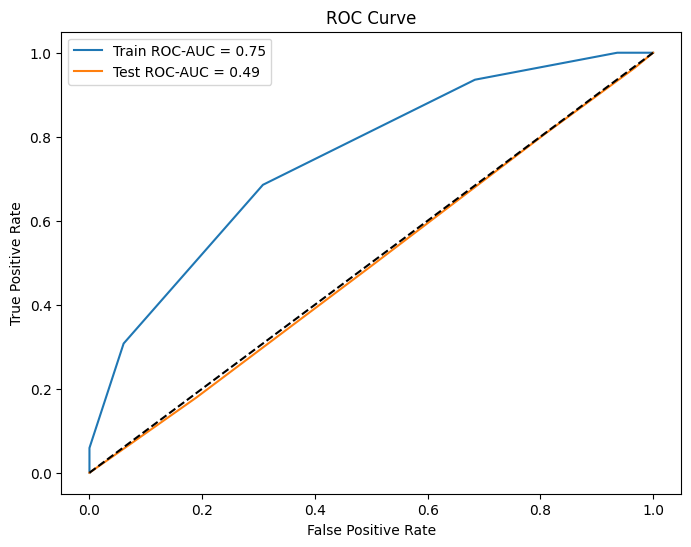

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Predict the probabilities for the positive class (class 1) for both train and test data
y_train_probs = knn.predict_proba(X_train)[:, 1]
y_test_probs = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC-AUC for train and test data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)

roc_auc_train = roc_auc_score(y_train, y_train_probs)
roc_auc_test = roc_auc_score(y_test, y_test_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC-AUC = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test ROC-AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#Model Deployment

In [57]:
data.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn', 'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York'],
      dtype='object')

In [59]:
X = data[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']]
y = data['Churn']


In [60]:
import pickle

# Train your KNN model (replace this with your actual training code)
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X, y)

# Save the trained model to a file
model_filename = 'knn.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(knn, model_file)

print(f"Model saved to {model_filename}")


Model saved to knn.pkl


In [62]:
import pickle
import numpy as np

# Load the trained KNN model
with open('/content/knn.pkl', 'rb') as model_file:
    knn_model = pickle.load(model_file)

# Input features from the command line
feature1 = float(input("Enter Age: "))
feature2 = float(input("Enter Subscription_Length: "))
feature3 = float(input("Enter Monthly Bill: "))
feature4 = float(input("Total Usage in GB: "))

# Make a prediction
input_data = np.array([feature1, feature2, feature3, feature4]).reshape(1, -1)
prediction = knn_model.predict(input_data)

print(f'Churn Prediction: {int(prediction[0])}')
if int(prediction[0]) == 1:
  print("Customer has Churned")
else:
  print("Customer has Not Churned")


Enter Age: 21
Enter Subscription_Length: 3
Enter Monthly Bill: 499
Total Usage in GB: 60
Churn Prediction: 0
Customer has Not Churned


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
